In [3]:
import os
os.chdir('/data/wjk/Workspace/Datasets/IGR')

import os.path as osp
import pandas as pd
pd.set_option('display.width', 500)    #设置整体宽度
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mtools import plot_cdf, plot_fig, load_json

df = pd.read_csv('Output/stat_df.csv')
exclude_phone = ['Mi8']
df=df[~df.isin(exclude_phone)]
df["err_h"]*=100
df["err_x"]*=100
df["err_y"]*=100
df["length"] = np.sqrt(df["gt_x"]**2 + df["gt_y"]**2)
pdf = df.rename(columns={'err_x':'Noise east (cm)','err_y':'Noise north (cm)', 'phone':'Device'})

route_type_dict = load_json(osp.join('plots', 'route_type_dict.json'))
pdf["Route type"] = pdf["trip"]
for route in route_type_dict:
    pdf.loc[pdf.__getattr__("Route type") == route, ('Route type')] = route_type_dict[route]
print(df.groupby('phone').mean(numeric_only=True))

                err_x     err_y      err_h      gt_x      gt_y    length
phone                                                                   
Mate30       0.066611 -0.016210  22.975406  0.007656 -0.038624  1.006969
Mate50       0.014649  0.015364  12.856556  0.302436  0.120335  1.276053
Mi11         0.056459 -0.052567  12.199846  0.289952  0.123011  1.260403
Nova9pro     0.042219 -0.116747  13.548898  0.116362  0.022865  1.292941
Oneplus9pro  0.119695 -0.217529  14.106604  0.117728  0.022167  1.290862
Oneplus9r    0.076017  0.044491  19.600422  0.302781  0.118726  1.276131
Pixel4       0.068787  0.162502  19.586493  0.119025  0.023737  1.293736
RedmiK40     0.044260 -0.058921  14.514923  0.115332  0.022161  1.294449
Vivox60     -0.080396 -0.139468  26.683278  0.299227  0.119574  1.276579


In [5]:
df[["err_x","err_y","gt_x","gt_y"]].corr().to_csv('Output/corr.csv')
des = df.groupby('phone')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/error_info.csv')

des = pdf.groupby('Route type')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/error_info_bytype.csv')

des = df.groupby('phone')["length"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/length_info.csv')

            count       mean        std       min        20%        25%        50%        75%        80%        90%         max
phone                                                                                                                          
Mate30     7599.0  22.975406  17.982189  0.269091   9.874438  11.264332  18.420694  28.931911  32.516018  44.041287  190.712101
Mate50     2943.0  12.859428  15.249887  0.102887   4.782794   5.434640   9.324165  15.185122  17.349442  24.654705  409.916330
Mi11       3063.0  12.209471  13.475615  0.228037   5.248158   5.953606   9.686733  14.962463  16.354401  21.489364  429.039833
Nova9pro   3921.0  13.538411  15.697498  0.203041   5.701366   6.547949  10.572201  16.481384  18.197527  25.511813  705.148510
Oneplus9r  2946.0  19.617185  17.971623  0.033995   7.505095   8.662185  15.170678  25.478374  28.147739  38.508447  413.123545
Pixel4     3439.0  19.580787  21.395580  0.132979   8.070725   9.217575  14.840841  23.174904  26.274808

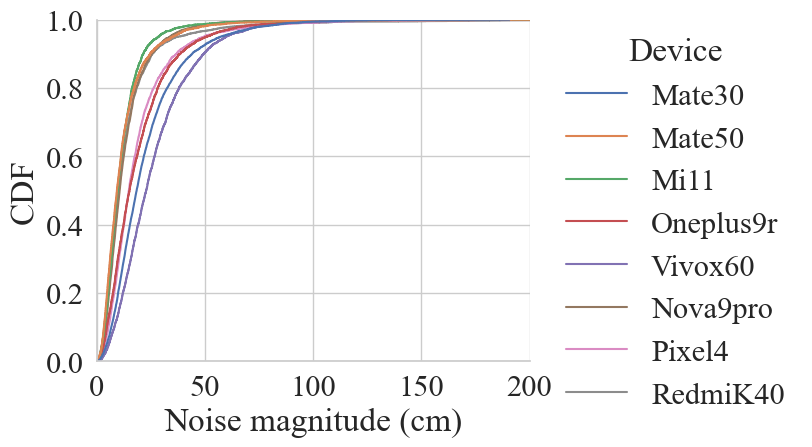

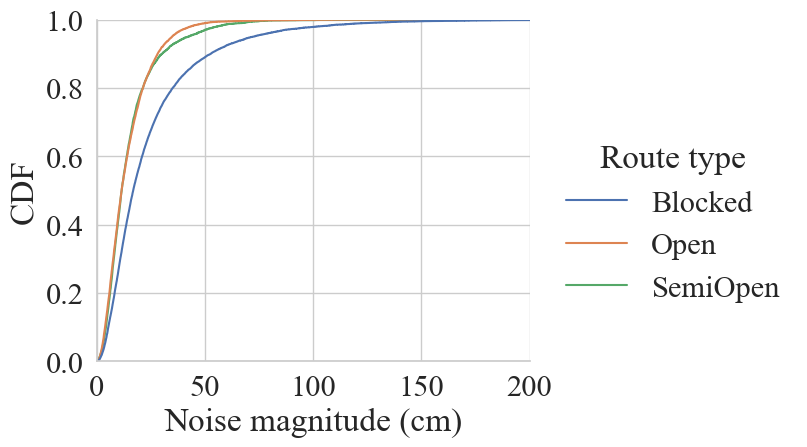

In [10]:
# g = plot_cdf(df, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2})
# plt.show()
# g.savefig('Figures/err_h_cdf.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Device'}) # 'col':'phone', 'col_wrap': 4
plt.show()
g.savefig('Figures/err_h_cdf_byphone.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Route type'}) # 'col':'phone', 'col_wrap': 4
plt.show()
g.savefig('Figures/err_h_cdf_bytype.png', dpi=150, pad_inches=0.2)

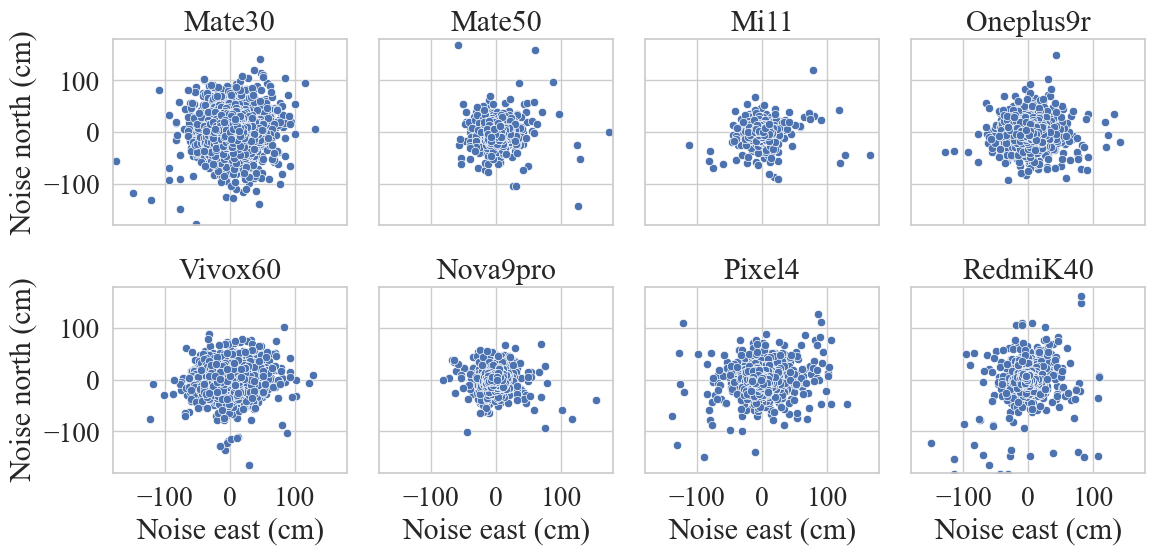

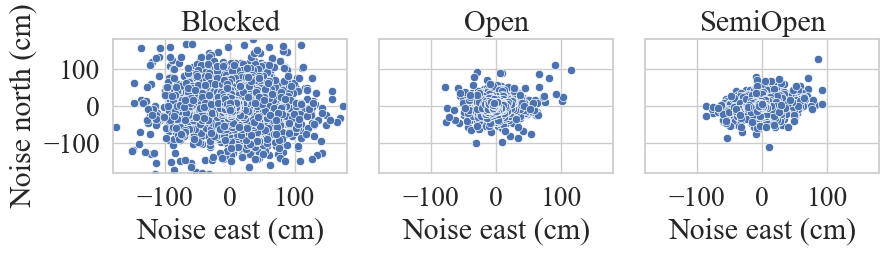

In [15]:
sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Device",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")

plt.show()
g.savefig('Figures/err_scatter_byphone.png', dpi=150, pad_inches=0.2)

sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Route type",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_scatter_bytype.png', dpi=150, pad_inches=0.2)

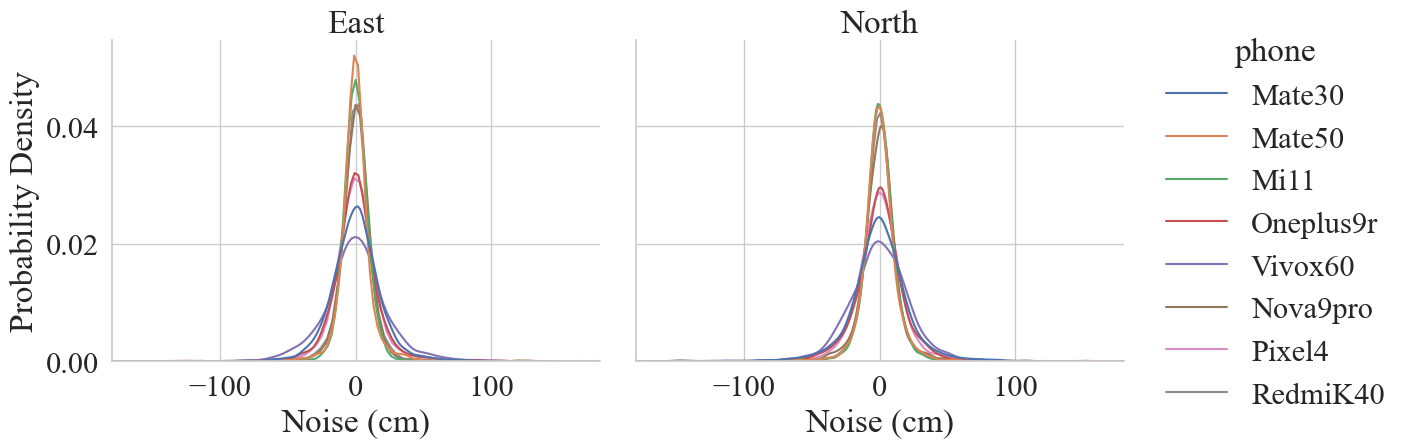

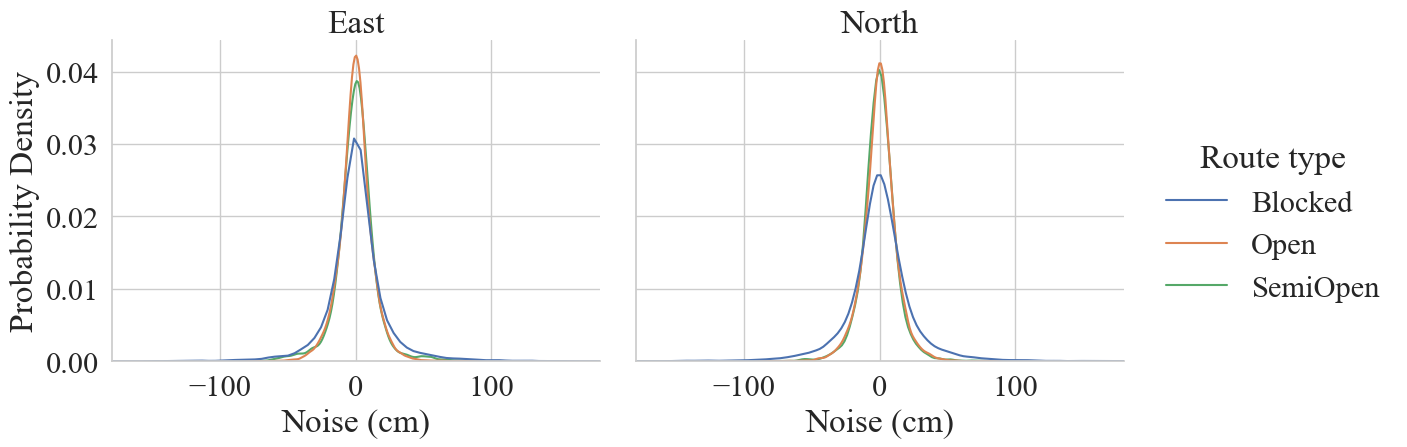

In [16]:
import numpy as np
new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'phone': np.hstack((df['phone'].values, df['phone'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'phone', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_byphone.png', dpi=150, pad_inches=0.2)

new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'Route type': np.hstack((pdf['Route type'].values, pdf['Route type'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'Route type', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_bytype.png', dpi=150, pad_inches=0.2)